# Indentification of Emergency Services Vehicle

The following code implements a neural network classification model to identify whether a vehicle is an emergency services vehicle or not.

## 1. Preprocessing and uploading data

In [ ]:
# import required libraries and functions
%matplotlib inline

import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image

from sklearn.model_selection import train_test_split

In [ ]:
# Display output of all code lines in Jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import os
if os.path.exists('/content/imageProcessing') == False:
  !git clone https://github.com/amrik220/imageProcessing

Cloning into 'imageProcessing'...
remote: Enumerating objects: 9091, done.
remote: Total 9091 (delta 0), reused 0 (delta 0), pack-reused 9091
Receiving objects: 100% (9091/9091), 65.15 MiB | 31.45 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
# to reproduce results
seed = 220
rng = np.random.RandomState(seed)

In [ ]:
# load data labels from the csv file
# data = pd.read_csv('./emergency_class_labels.csv')
data = pd.read_csv('/content/imageProcessing/classify_as_emergency_vehicle/emergency_class_labels.csv')

data.head()
data.shape

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


(2352, 2)

In [ ]:
# check class balance
data.emergency_or_not.value_counts()
data.emergency_or_not.value_counts()[1]/data.emergency_or_not.value_counts()[0]*100

0    1361
1     991
Name: emergency_or_not, dtype: int64

72.81410727406319

In [ ]:
# load images and store it in a numpy array
x = []
for img_name in data.image_names:
    # img = plt.imread('./images/' + img_name)
    img = plt.imread('/content/imageProcessing/classify_as_emergency_vehicle/images/' + img_name)

    x.append(img)
    
x = np.array(x)

# create target
y = data.emergency_or_not.values

x.ndim, x.shape

(4, (2352, 224, 224, 3))

In [ ]:
x[0][0:223][0:223][0:2]

array([[[115, 134, 141],
        [116, 135, 142],
        [116, 135, 142],
        ...,
        [ 70,  81,  87],
        [ 74,  85,  91],
        [ 82,  93,  99]],

       [[115, 134, 141],
        [116, 135, 142],
        [116, 135, 142],
        ...,
        [ 82,  93,  99],
        [ 82,  93,  99],
        [ 83,  94, 100]]], dtype=uint8)

In [ ]:
# reshape to one single row
x = x.reshape(2352, 224*224*3)

In [ ]:
# preprocessing
x_min = x.min()
x_max = x.max()
x = (x - x_min) / (x_max - x_min)

In [ ]:
# Split into Train and Test set
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=seed)

In [ ]:
x_train.shape, x_test.shape
y_train[0:4], y_test[0:4]

((1646, 150528), (706, 150528))

(array([0, 0, 1, 0]), array([1, 0, 0, 1]))

## 2. Build nn model

In [ ]:
model=Sequential()

model.add(Dense(100, input_dim=224*224*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               15052900  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


### Train the model and perform testing

In [ ]:
batch = y_train.shape[0]//10
batch

164

In [ ]:
# model.fit(x_train, y_train, epochs=2, batch_size=batch ,validation_data=(x_test,y_test))
model.fit(x_train, y_train, epochs=10, batch_size=batch ,validation_data=(x_test,y_test))

Epoch 1/10
11/11 [==============================] - 4s 332ms/step - loss: 0.9153 - accuracy: 0.5310 - val_loss: 0.6477 - val_accuracy: 0.6076
Epoch 2/10
11/11 [==============================] - 3s 281ms/step - loss: 0.6405 - accuracy: 0.6452 - val_loss: 0.6286 - val_accuracy: 0.6544
Epoch 3/10
11/11 [==============================] - 3s 284ms/step - loss: 0.6599 - accuracy: 0.6045 - val_loss: 0.8536 - val_accuracy: 0.3994
Epoch 4/10
11/11 [==============================] - 3s 286ms/step - loss: 0.6331 - accuracy: 0.6646 - val_loss: 0.6335 - val_accuracy: 0.6445
Epoch 5/10
11/11 [==============================] - 3s 284ms/step - loss: 0.6085 - accuracy: 0.6677 - val_loss: 1.3352 - val_accuracy: 0.3909
Epoch 6/10
11/11 [==============================] - 3s 283ms/step - loss: 0.6779 - accuracy: 0.6531 - val_loss: 0.6436 - val_accuracy: 0.6289
Epoch 7/10
11/11 [==============================] - 3s 283ms/step - loss: 0.5944 - accuracy: 0.6938 - val_loss: 0.9380 - val_accuracy: 0.3980
Epoch 

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
23 % sure that it is an emergency vehicle
Whereas actual class is  1


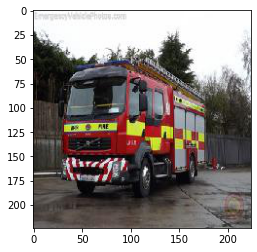

In [ ]:
# make predictions
predictions = model.predict_classes(x_test)[:, 0]
prediction_probabilities = model.predict(x_test)[:, 0]

# load out the original images, which correspond to the test data
_, test_vehicles, _, test_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot a image
index = rng.choice(range(len(test_vehicles)))

# get the predicted class probability
img_name = test_vehicles[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# load the image
# img = plt.imread('/images/' + img_name)
img = plt.imread('/content/imageProcessing/classify_as_emergency_vehicle/images/' + img_name)


# print probability and actual class
print(prob , '% sure that it is an emergency vehicle')
print('Whereas actual class is ', test_y[index])

# plot image
plt.imshow(img)

In [ ]:
# check the incorrect predictions
incorrect_indices = np.where(predictions != y_test)[0]

In [ ]:
len(incorrect_indices), predictions.shape
len(incorrect_indices)/ predictions.shape[0]*100 # misclassification percentage

(276, (706,))

39.09348441926346

12 % sure that it is an emergency vehicle
Whereas actual class is  1


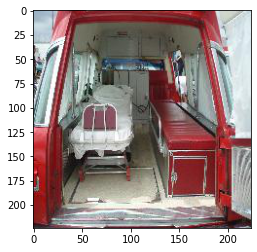

In [ ]:
index = rng.choice(incorrect_indices)
img_name = test_vehicles[index]


prob = (prediction_probabilities * 100).astype(int)[index]

img = plt.imread('/content/imageProcessing/classify_as_emergency_vehicle/images/' + img_name)

print(prob , '% sure that it is an emergency vehicle')
print('Whereas actual class is ', y_test[index])

plt.imshow(img)

## 3. Hyperparameter Tuning

In [ ]:
# change activation function of hidden layer
# increase hidden neurons
# increase hidden layers
# increase number of epochs
# change optimizer

In [ ]:
# # change activation function of hidden layer and check model accuracy
# model=Sequential()

# model.add(Dense(100, input_dim=224*224*3, activation='tanh'))
# model.add(Dense(units=1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
# model.fit(x_train, y_train, epochs=10, batch_size=batch, validation_data=(x_test,y_test))

In [ ]:
# # increase hidden neurons and check model accuracy
# model=Sequential()

# model.add(Dense(1024, input_dim=224*224*3, activation='sigmoid'))
# model.add(Dense(units=1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
# model.fit(x_train, y_train, epochs=10, batch_size=batch, validation_data=(x_test,y_test))

In [ ]:
# # increase number of epochs and check model accuracy
# model=Sequential()

# model.add(Dense(1024, input_dim=224*224*3, activation='sigmoid'))
# model.add(Dense(units=1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
# model.fit(x_train, y_train, epochs=50, batch_size=batch, validation_data=(x_test,y_test))

In [ ]:
# # increase hidden layers and check model accuracy
# model=Sequential()

# model.add(Dense(1024, input_dim=224*224*3, activation='sigmoid'))
# model.add(Dense(1024, activation='sigmoid'))
# model.add(Dense(units=1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
# model.fit(x_train, y_train, epochs=50, batch_size=batch, validation_data=(x_test,y_test))

### Adam optimization algorithm

In [ ]:
from keras.optimizers import Adam

In [ ]:
adam = Adam(lr=1e-5)

In [ ]:
# change optimizer
model=Sequential()

model.add(Dense(1024, input_dim=224*224*3, activation='sigmoid'))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=batch, validation_data=(x_test,y_test))
# model.fit(x_train, y_train, epochs=10, batch_size=batch, validation_data=(x_test,y_test))
# model.fit(x_train, y_train, epochs=50, batch_size=batch, validation_data=(x_test,y_test))

Epoch 1/5
11/11 [==============================] - 24s 2s/step - loss: 0.6901 - accuracy: 0.5674 - val_loss: 0.6662 - val_accuracy: 0.6076
Epoch 2/5
11/11 [==============================] - 24s 2s/step - loss: 0.6406 - accuracy: 0.6337 - val_loss: 0.6435 - val_accuracy: 0.6445
Epoch 3/5
11/11 [==============================] - 23s 2s/step - loss: 0.6206 - accuracy: 0.6689 - val_loss: 0.6248 - val_accuracy: 0.6601
Epoch 4/5
11/11 [==============================] - 23s 2s/step - loss: 0.5975 - accuracy: 0.6920 - val_loss: 0.6142 - val_accuracy: 0.6728
Epoch 5/5
11/11 [==============================] - 23s 2s/step - loss: 0.5896 - accuracy: 0.6926 - val_loss: 0.6044 - val_accuracy: 0.6771


9 % sure that it is an emergency vehicle
Whereas actual class is  0


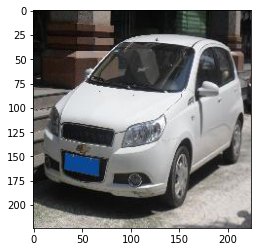

In [ ]:
# make predictions
predictions = model.predict_classes(x_test)[:, 0]
prediction_probabilities = model.predict(x_test)[:, 0]

# load out the original images, which correspond to the test data
_, test_vehicles, _, test_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot a image
index = rng.choice(range(len(test_vehicles)))

# get the predicted class probability
img_name = test_vehicles[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# load the image
# img = plt.imread('/images/' + img_name)
img = plt.imread('/content/imageProcessing/classify_as_emergency_vehicle/images/' + img_name)

# print probability and actual class
print(prob , '% sure that it is an emergency vehicle')
print('Whereas actual class is ', test_y[index])

# plot image
plt.imshow(img)

In [ ]:
# check the incorrect predictions
incorrect_indices = np.where(predictions != y_test)[0]

In [ ]:
len(incorrect_indices), predictions.shape
len(incorrect_indices)/ predictions.shape[0]*100 # misclassification percentage

(228, (706,))

32.29461756373937

35 % sure that it is an emergency vehicle
Whereas actual class is  1


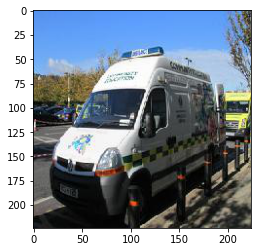

In [ ]:
index = rng.choice(incorrect_indices)
img_name = test_vehicles[index]


prob = (prediction_probabilities * 100).astype(int)[index]

# img = plt.imread('/images/' + img_name)
img = plt.imread('/content/imageProcessing/classify_as_emergency_vehicle/images/' + img_name)

print(prob , '% sure that it is an emergency vehicle')
print('Whereas actual class is ', y_test[index])

plt.imshow(img)